In [1]:
import pandas as pd
import ast
import nltk
import re
from string import punctuation
import matplotlib.pyplot as plt
import numpy as np
import gensim
import json
from shapely.geometry import shape

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
en_stop = set(nltk.corpus.stopwords.words('english'))
tweets_full = pd.read_csv('trump-tweets_full3.csv')
tweets_full.head()
df = tweets_full.dropna(subset=['place'])

In [3]:
df.shape
df['place'][0]
df.head()

,Unnamed: 0,user,tweet,date,source,location,place
0,0,"{'id': 4840937793, 'id_str': '4840937793', 'na...",@realDonaldTrump Praise the Lord and God Bless...,Thu May 02 23:59:33 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",NaN,"{'id': '30122139c70b1ced', 'url': 'https://api..."
1,1,"{'id': 880461598963486720, 'id_str': '88046159...",@realDonaldTrump How dare you??? You are the m...,Thu May 02 23:58:52 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",NaN,"{'id': 'de599025180e2ee7', 'url': 'https://api..."
2,2,"{'id': 772599851192164352, 'id_str': '77259985...",@realDonaldTrump That’s right !!! Now it’s tim...,Thu May 02 23:58:01 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{'id': 'c0f3c245d5046c11', 'url': 'https://api..."
3,3,"{'id': 717149686176550912, 'id_str': '71714968...",@realDonaldTrump Ok...can you use just a littl...,Thu May 02 23:56:21 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",NaN,"{'id': '00504a961360c1a2', 'url': 'https://api..."
4,4,"{'id': 3350989983, 'id_str': '3350989983', 'na...",@realDonaldTrump What a joke even considering ...,Thu May 02 23:56:15 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{'id': '4ec01c9dbc693497', 'url': 'https://api..."


In [4]:
ids = []
city_state = []
country = []
coordinates = []
name = []
state = []
for locations in df['place']:
    try:
        info = ast.literal_eval(locations)
        ids.append(info['id'])
        name.append(info['name'].lower())
        if ',' in info['full_name'] :
            #print(info['full_name'].split(',')[1].lower())
            state.append(info['full_name'].split(', ')[1].lower())
        else:
            state.append(info['full_name'].split(', ')[0].lower())
        city_state.append(info['full_name'])
        country.append(info['country'])
        coordinates.append(shape(info['bounding_box']))
    except ValueError:
        print(locations)


df['id'] = ids
df['city'] = name
df['state'] = state
df['place'] = city_state
df['coordinates'] = coordinates
df['country'] = country
#locs_df = pd.DataFrame({'id': ids,
 #                       'city': name,
  #                      'state': state,
   #                     'place': city_state,
    #                    'coordinates': coordinates,
     #                   'country': country})

#tweet_locs = locs_df[locs_df['country'] == 'United States']

C:\Users\nazbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nazbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nazbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [5]:
#locs_df.head(10)
#import uszipcode
#search = uszipcode.SearchEngine(simple_zipcode=True)
#search.by_coordinates(list(coordinates[0].exterior.coords)[3][0], list(coordinates[0].exterior.coords)[3][1])
#list(coordinates[0].exterior.coords)[0][0]
#list(coordinates[0].exterior.coords.xy)
#search.by_city_and_state(name[0], state[0])
tweets = df[df['country'] == 'United States']
#tweets = df
tweets = tweets.drop(['location'], axis=1)
tweets = tweets.drop(['Unnamed: 0'], axis=1)
tweets = tweets[tweets['state'] != 'united states']
#tweets = tweets.drop(['place'], axis=1)
tweets = tweets.drop(['country'], axis=1)
tweets = tweets.drop(['coordinates'], axis=1)
tweets = tweets[tweets['state'] != 'usa']
tweets = tweets[tweets['city'] != 'united states']
tweets = tweets[tweets['state'] != 'mexican manhattan']
tweets = tweets.reset_index(drop=True)
tweets.head()

,user,tweet,date,source,place,id,city,state
0,"{'id': 4840937793, 'id_str': '4840937793', 'na...",@realDonaldTrump Praise the Lord and God Bless...,Thu May 02 23:59:33 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","Dawson Springs, KY",30122139c70b1ced,dawson springs,ky
1,"{'id': 772599851192164352, 'id_str': '77259985...",@realDonaldTrump That’s right !!! Now it’s tim...,Thu May 02 23:58:01 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...","Crescent City North, CA",c0f3c245d5046c11,crescent city north,ca
2,"{'id': 717149686176550912, 'id_str': '71714968...",@realDonaldTrump Ok...can you use just a littl...,Thu May 02 23:56:21 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","Hazlet, NJ",00504a961360c1a2,hazlet,nj
3,"{'id': 1036966685947953152, 'id_str': '1036966...",@realDonaldTrump Why ia your administration no...,Thu May 02 23:55:52 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","Odessa, TX",2c0346ba4b733e24,odessa,tx
4,"{'id': 990070195, 'id_str': '990070195', 'name...",@realDonaldTrump Democrats are SERIOUS about t...,Thu May 02 23:55:18 +0000 2019,"<a href=""http://twitter.com/#!/download/ipad"" ...","Franklin, TN",cc631a80adacd459,franklin,tn


In [8]:
import uszipcode
search = uszipcode.SearchEngine(simple_zipcode=True)
#results = search.by_city_and_state(tweets['city'][0], tweets['state'][0], returns=1)[0]

#print(results)
#print(results.zipcode)
#print(results.population)
#print(results.median_household_income)

In [9]:
#tweets = tweets[tweets['state'] != 'usa']
#tweets = tweets[tweets['city'] != 'united states']
#tweets = tweets[tweets['state'] != 'mexican manhattan']
#tweets.head()

zipcode = []
population = []
median_household_income = []
err_indx = []
for i in range(tweets.shape[0]):
    try:
        results = search.by_city_and_state(tweets['city'][i], tweets['state'][i], returns=1)[0]
        zipcode.append(results.zipcode)
        population.append(results.population)
        median_household_income.append(results.median_household_income)
    
    except IndexError:
        err_indx.append(i)
        zipcode.append('NaN')
        population.append('NaN')
        median_household_income.append('NaN')
        
    if i % 100 == 0:
        print("AT USER ", i)

tweets['population_size'] = population
tweets['zipcode'] = zipcode
tweets['median_income'] = median_household_income


AT USER  0
AT USER  100
AT USER  200
AT USER  300
AT USER  400


KeyboardInterrupt: 

In [ ]:
#tweets = pd.read_csv('tweets_all.csv')
#tweets = tweets.dropna(axis=0).reset_index(drop=True)

In [11]:
#tweets = tweets.drop(['Unnamed: 0'], axis=1)
#tweets = tweets.dropna(axis=0).reset_index(drop=True)
tweets.head()

,user,tweet,date,source,place,id,city,state
0,"{'id': 4840937793, 'id_str': '4840937793', 'na...",@realDonaldTrump Praise the Lord and God Bless...,Thu May 02 23:59:33 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","Dawson Springs, KY",30122139c70b1ced,dawson springs,ky
1,"{'id': 772599851192164352, 'id_str': '77259985...",@realDonaldTrump That’s right !!! Now it’s tim...,Thu May 02 23:58:01 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...","Crescent City North, CA",c0f3c245d5046c11,crescent city north,ca
2,"{'id': 717149686176550912, 'id_str': '71714968...",@realDonaldTrump Ok...can you use just a littl...,Thu May 02 23:56:21 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","Hazlet, NJ",00504a961360c1a2,hazlet,nj
3,"{'id': 1036966685947953152, 'id_str': '1036966...",@realDonaldTrump Why ia your administration no...,Thu May 02 23:55:52 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","Odessa, TX",2c0346ba4b733e24,odessa,tx
4,"{'id': 990070195, 'id_str': '990070195', 'name...",@realDonaldTrump Democrats are SERIOUS about t...,Thu May 02 23:55:18 +0000 2019,"<a href=""http://twitter.com/#!/download/ipad"" ...","Franklin, TN",cc631a80adacd459,franklin,tn


In [12]:
cleaned_twts = []
for tweet in tweets['tweet']:
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet).split())
    tweet = ''.join([i for i in tweet if not i.isdigit()])
    tweet = re.sub('\n', ' ', tweet)
    tweet = re.sub('\r', '', tweet)
    tweet = re.sub('"', '', tweet)
    tweet = re.sub('\'', '', tweet)
    twt = ""
    for c in tweet:
        if c not in punctuation or c == '#':
            twt += c
    cleaned_twts.append(twt)

tweets['tweet'] = cleaned_twts

source = []
android = "android"
ipad = "ipad"
iphone = "iphone"
twitter = "web"
mac = "macos"
windows = "windows"
for s in tweets['source']:
    if "Twitter for Android" in s or "Android" in s:
        source.append(android)
    elif "Twitter for iPad" in s:
        source.append(ipad)
    elif "Twitter for iPhone" in s or "iOS" in s:
        source.append(iphone)
    elif "Mac" in s:
        source.append(mac)
    elif "Windows" in s:
        source.append(windows)
    elif "Twitter Web App" in s or "Twitter Web Client" in s:
        source.append(twitter)
    else:
        source.append('Other')

tweets['source'] = source

In [13]:
tweets.head()

,user,tweet,date,source,place,id,city,state
0,"{'id': 4840937793, 'id_str': '4840937793', 'na...",Praise the Lord and God Bless our President,Thu May 02 23:59:33 +0000 2019,android,"Dawson Springs, KY",30122139c70b1ced,dawson springs,ky
1,"{'id': 772599851192164352, 'id_str': '77259985...",That s right Now it s time for the rule of law...,Thu May 02 23:58:01 +0000 2019,iphone,"Crescent City North, CA",c0f3c245d5046c11,crescent city north,ca
2,"{'id': 717149686176550912, 'id_str': '71714968...",Ok can you use just a little bit more fake pie...,Thu May 02 23:56:21 +0000 2019,android,"Hazlet, NJ",00504a961360c1a2,hazlet,nj
3,"{'id': 1036966685947953152, 'id_str': '1036966...",Why ia your administration not dealing with th...,Thu May 02 23:55:52 +0000 2019,android,"Odessa, TX",2c0346ba4b733e24,odessa,tx
4,"{'id': 990070195, 'id_str': '990070195', 'name...",Democrats are SERIOUS about this BarrHearing a...,Thu May 02 23:55:18 +0000 2019,ipad,"Franklin, TN",cc631a80adacd459,franklin,tn


In [14]:
sentiment_scores = []
sid = SentimentIntensityAnalyzer()

for tweet in tweets['tweet']:
    sentiment_scores.append(sid.polarity_scores(tweet)['compound'])

In [15]:
tweets['sentiment'] = sentiment_scores

In [16]:
tweets.head()

,user,tweet,date,source,place,id,city,state,sentiment
0,"{'id': 4840937793, 'id_str': '4840937793', 'na...",Praise the Lord and God Bless our President,Thu May 02 23:59:33 +0000 2019,android,"Dawson Springs, KY",30122139c70b1ced,dawson springs,ky,0.8176
1,"{'id': 772599851192164352, 'id_str': '77259985...",That s right Now it s time for the rule of law...,Thu May 02 23:58:01 +0000 2019,iphone,"Crescent City North, CA",c0f3c245d5046c11,crescent city north,ca,0.0000
2,"{'id': 717149686176550912, 'id_str': '71714968...",Ok can you use just a little bit more fake pie...,Thu May 02 23:56:21 +0000 2019,android,"Hazlet, NJ",00504a961360c1a2,hazlet,nj,-0.6198
3,"{'id': 1036966685947953152, 'id_str': '1036966...",Why ia your administration not dealing with th...,Thu May 02 23:55:52 +0000 2019,android,"Odessa, TX",2c0346ba4b733e24,odessa,tx,-0.6908
4,"{'id': 990070195, 'id_str': '990070195', 'name...",Democrats are SERIOUS about this BarrHearing a...,Thu May 02 23:55:18 +0000 2019,ipad,"Franklin, TN",cc631a80adacd459,franklin,tn,-0.4881


In [17]:
tweets['sentiment_type'] = ''

In [18]:
tweets.head()

,user,tweet,date,source,place,id,city,state,sentiment,sentiment_type
0,"{'id': 4840937793, 'id_str': '4840937793', 'na...",Praise the Lord and God Bless our President,Thu May 02 23:59:33 +0000 2019,android,"Dawson Springs, KY",30122139c70b1ced,dawson springs,ky,0.8176,
1,"{'id': 772599851192164352, 'id_str': '77259985...",That s right Now it s time for the rule of law...,Thu May 02 23:58:01 +0000 2019,iphone,"Crescent City North, CA",c0f3c245d5046c11,crescent city north,ca,0.0000,
2,"{'id': 717149686176550912, 'id_str': '71714968...",Ok can you use just a little bit more fake pie...,Thu May 02 23:56:21 +0000 2019,android,"Hazlet, NJ",00504a961360c1a2,hazlet,nj,-0.6198,
3,"{'id': 1036966685947953152, 'id_str': '1036966...",Why ia your administration not dealing with th...,Thu May 02 23:55:52 +0000 2019,android,"Odessa, TX",2c0346ba4b733e24,odessa,tx,-0.6908,
4,"{'id': 990070195, 'id_str': '990070195', 'name...",Democrats are SERIOUS about this BarrHearing a...,Thu May 02 23:55:18 +0000 2019,ipad,"Franklin, TN",cc631a80adacd459,franklin,tn,-0.4881,


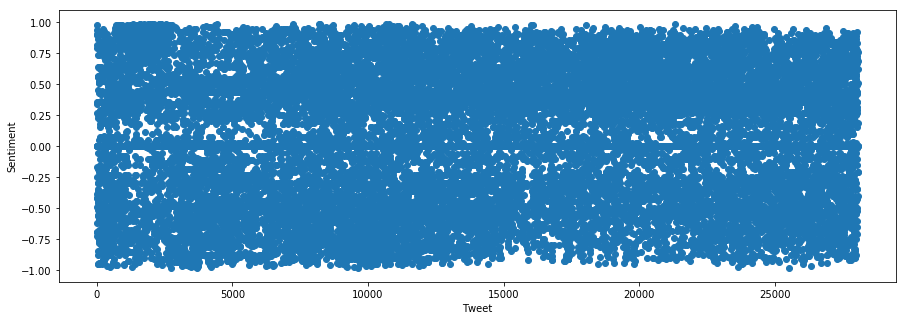

In [19]:
plt.figure(figsize=(15,5))
plt.xlabel('Tweet')
plt.ylabel('Sentiment')
plt.scatter(np.arange(len(sentiment_scores)), sentiment_scores)

In [20]:
tweets.loc[tweets.sentiment>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment<0,'sentiment_type']='NEGATIVE'

In [21]:
tweets.to_csv('tweets_at_trump_41.csv')